<h1> Árvore </h1>
Árvores são estruturas de dados hierárquicas. Basicamente, árvores são formadas por um conjunto de elementos, os quais chamamos nós (ou vértices) conectados de forma específica por um conjunto de arestas. Um dos nós, que dizemos estar no nível 0, é a raiz da árvore, e está no topo da hierarquia. A raiz está conectada a outros nós, que estão no nível 1, que por sua vez estão conectados a outros nós, no nível 2, e assim por diante.

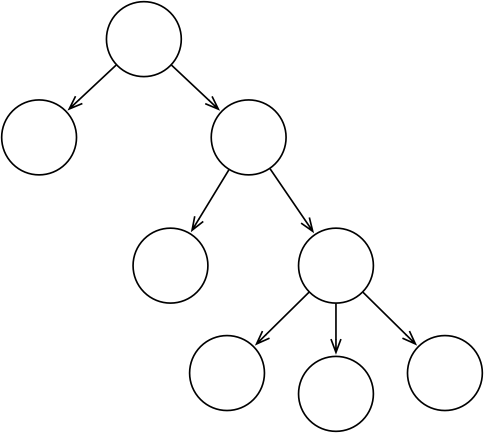

As conexões entre os nós de uma árvore seguem uma nomenclatura genealógica. Um nó em um dado nível está conectado a seus filhos (no nível abaixo) e a seu pai (no nível acima). A raiz da árvore, que está no nível 0, possui filhos mas não possui pai.

Árvores podem ser desenhadas de muitas formas, mas a convenção em Computação é desenhá-las com a raíz no topo, apesar de isso ser um pouco contra-intuitivo de acordo com nossa noção de árvore do cotidiano.

<h2> Árvores Binárias </h2>
Árvores binárias são árvores nas quais cada nodo pode ter no máximo dois filhos, conforme mostrado na figura abaixo.

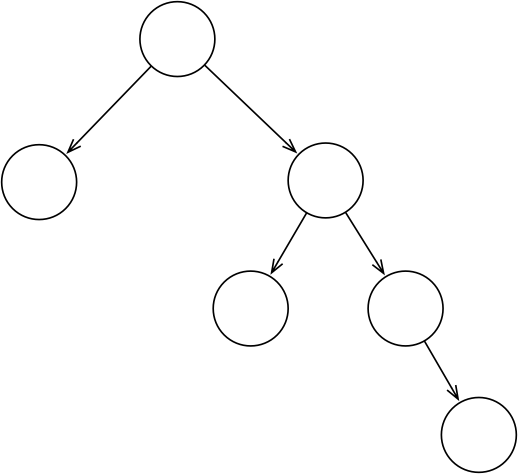

Uma árvore binária pode ser definida de forma recursiva, de acordo com o raciocínio a seguir. A raiz da árvore possui dois filhos, um à direita e outro à esquerda, que por sua vez são raizes de duas sub-árvores. Cada uma dessas sub-árvores possui uma sub-árvore esquerda e uma sub-árvore direita, seguindo esse mesmo raciocínio.

<h2> Representação de Árvores Binárias </h2>
Na prática, os nós de uma árvore binária possuem um valor (chamado de chave) e dois apontadores, um para o filho da esquerda e outro para o filho da direita. Esses apontadores representam as ligações (arestas) de uma árvore. Veja abaixo uma implementação de árvore binária.

In [ ]:
class no_arvore:
    def __init__(self, chave=None, esquerda=None, direita=None):
        self.chave = chave
        self.esquerda = esquerda
        self.direita = direita

    def __repr__(self):
        return '(%s <- (%s) -> %s)' % (self.esquerda and self.esquerda.chave, self.chave, self.direita and self.direita.chave)

Vejamos como criar nós de uma árvore usando o código acima.

In [ ]:
raiz = no_arvore(3)
raiz.esquerda = no_arvore(5)
raiz.direita  = no_arvore(1)
print("Árvore: ", raiz)

A figura abaixo a árvore binária implementada acima. Note que o nó raíz (nó com o valor 3), possui dois filhos, um à esquerda (com o valor 5) e outro à direita (com o valor 1).

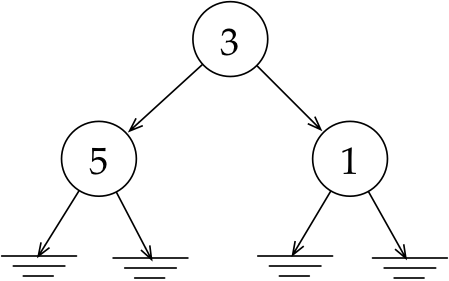

Note também que os nós cujos valores são 5 e 1 não possuem filhos (seus apontadores esquerda e direita são None, ou seja, não apontam para nenhum outro nó).

<h2> Árvores Binárias de Pesquisa </h2>
Árvores binárias de pesquisa (ou Binary Search Tress - BSTs, do Inglês) são árvores cujos nós são organizados de acordo com algumas propriedades. Mais formalmente, podemos definir árvores binárias de pesquisa como abaixo:

<b> Definição de Árvore Binária de Pesquisa: </b> 

Seja $x$ um nó em uma árvore binária de pesquisa. Se $y$ é um nó na sub-árvore esquerda de $x$, então $y$.chave ≤ $x$.chave. Se $y$ é um nodo na sub-árvore direita de $x$, então $y$.chave ≥ $x$.chave.

Em outras palavras, árvores binárias de pesquisa são árvores que obedecem às seguintes propriedades:

- Dado um nós qualquer da árvore, todos os nós à esqueda dele são menores ou iguais a ele.

- Dado um nó qualquer da árvore, todos os nós à direita dele são maiores ou iguais a ele.

Para simplificar as coisas, não permitiremos elementos repetidos em nossas implementações de BSTs, portanto, nós à esquerda de um nó sempre serão menores que ele, e nós à direita de um nó serão sempre maiores que ele.

<h2> Caminhos em Árvore <h2>

Caminhos em árvore são formas de visitarmos todos os nós de uma árvore em uma ordem pré-definida. Existem três tipos de caminhos básicos: pré-ordem, em ordem, e pós-ordem. Esses três tipos de caminhos são bem parecidos, como veremos abaixo.

Começaremos nossa explicação com o caminhamento em ordem. Nesse tipo de caminhamento, visitamos recursivamente o nó da esquerda, visitamos o nó corrente, e visitamos recursivamente o nó da direita. Assim, dadas as restrições de uma árvore binária de pesquisa, ao realizarmos o caminhamento em ordem, estaremos de fato visitando os nós em ordem crescente de chaves. Entretanto, os três tipos de caminhos explicados aqui podem ser usados para qualquer tipo de árvore. A única diferença é que ordem em que os nós serão impressos. Por exemplo, o caminhamento em ordem em uma BST imprime os nós em ordem crescente, mas em uma árvore binária qualquer a ordem pode não ser essa.

Para ilustrar o caminhamento em ordem, primeiro construiremos uma árvore binária de pesquisa:

In [ ]:
raiz = no_arvore(40)

raiz.esquerda = no_arvore(20)
raiz.direita  = no_arvore(60)

raiz.direita.esquerda  = no_arvore(50)
raiz.direita.direita   = no_arvore(70)
raiz.esquerda.esquerda = no_arvore(10)
raiz.esquerda.direita  = no_arvore(30)

Note que obedecemos as propriedades de árvores binárias de pesquisa ao inserirmos os nós na árvore acima.

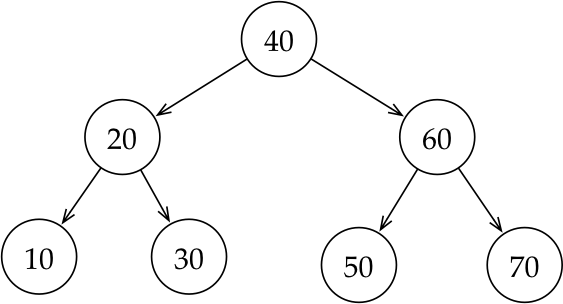

A figura ao lado mostra uma representação visual da árvore construída acima.

Agora, vejamos como implementar o caminho 'em-ordem'.

In [ ]:
def em_ordem(raiz):
    if not raiz:
        return

    # Visita filho da esquerda.
    em_ordem(raiz.esquerda)

    # Visita nodo corrente.
    print(raiz.chave),

    # Visita filho da direita.
    em_ordem(raiz.direita)

O código acima é uma implementação direta da ideia de caminhamento em ordem. Vejamos o que acontece ao executarmos o código acima na árvore criada anteriormente:

In [ ]:
em_ordem(raiz)

Neste momento, é importante fazermos uma ressalva: ao explicar o camino *em-ordem* dizemos que visitamos o nó corrente, mas na implementação acima simplesmente imprimimos o valor do campo chave de cada nó. Isso ocorre porque o termo visitar pode significar tanto algo simples como imprimir o valor da chave, quanto realizar alguma operação mais complexa. A ideia geral do caminho em ordem não muda, independente das operações que são realizadas quando visitamos um nó.

Os outros dois tipos de caminho seguem o mesmo raciocínio do caminho em ordem. A única diferença é a ordem em que visitamos o nó corrente. No caminho pré-ordem, visitamos o nó corrente antes de visitarmos recursivamente os nós da esquerda e direita. No caminho pós-ordem visitamos o nó corrente depois de visitarmos recursivamente os nós da esquerda e direita. A figura abaixo resume os três tipos de caminhos em árvores.

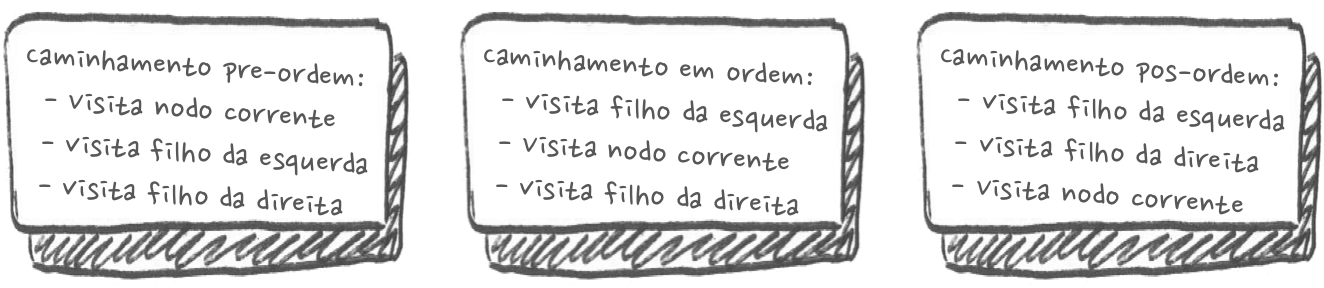

<h2> Inserção em Árvores Binárias de Pesquisa </h2>
Na seção anterior, inserimos os nós na árvore binária de pesquisa um a um, e para garantir que as propriedades de BSTs fossem preservadas, tivemos que indicar explicitamente onde cada nó deveria ser inserido. Nesta seção, veremos como codificar as regras de BSTs em um procedimento de inserção de modo que, ao chamarmos esse procedimento, as regras de BSTs sejam aplicadas a cada nó inserido, sem que tenhamos que indicar explicitamente onde os nós devem ficar.

O maior desafio ao se construir uma função para inserir nós em uma árvore binária de pesquisa é encontrar o ponto onde cada nó deve ser inserido. Uma vez encontrado esse ponto, podemos simplesmente ajustar os apontadores esquerda ou direita para que o nó seja inserido na árvore.

Para encontrar o ponto de inserção de um nó em uma árvore binária de pesquisa, precisamos observar as propriedades dessas árvores: dado um nó qualquer, nós menores do que ele são inseridos à sua esquerda, e nós maiores do que ele são inseridos à sua direita. Vejamos como transformar essas ideias em código.

In [ ]:
def insere(raiz, no):
    """Insere um no em uma árvore binária de pesquisa."""
    # no deve ser inserido na raiz.
    if raiz is None:
        raiz = no

    # no deve ser inserido na subárvore direita.
    elif raiz.chave < no.chave:
        if raiz.direita is None:
            raiz.direita = no
        else:
            insere(raiz.direita, no)

    # no deve ser inserido na subárvore esquerda.
    else:
        if raiz.esquerda is None:
            raiz.esquerda = no
        else:
            insere(raiz.esquerda, no)

Agora criaremos a mesma árvore criada anteriormente, mas desta vez usando a função de inserção que acabamos de desenvolver.

In [ ]:
# Cria uma árvore binária de pesquisa.
raiz = no_arvore(40)
for chave in [20, 60, 50, 70, 10, 30]:
    nodo = no_arvore(chave)
    insere(raiz, nodo)
# Imprime o caminhamento em ordem da árvore.
em_ordem(raiz)

Apesar de alguns conceitos de árvores parecerem complexos, temos sido capazes de implementá-los com relativa facilidade. Isso se deve ao fato de que a maioria dos conceitos de árvores possuirem uma natureza inerentemente recursiva. Assim, a implementação deles usando recursividade acaba sendo natural e simples. Sempre que você se deparar com um problema envolvendo árvores, tente pensar em uma solução recursiva antes de mais nada.

<h1> Busca em Árvores Binárias de Pesquisa </h1>
Assim como a partir das propriedades de árvores binárias de pesquisa fomos capazes de criar um algoritmo para inserir nós nessas árvores, faremos também para procurar nós nelas. O algoritmo de busca em árvores binárias de pesquisa pode ser dividido em três casos:

1. A chave procurada está na raiz da árvore. Nesse caso, simplesmente retornamos a raiz da árvore como resultado da busca.

2. A chave procurada é menor que a chave do nó raiz. Nesse caso, precisamos procurar pela chave somente na sub-árvore esquerda.

3. A chave procurada é maior que a chave do nó raiz. Nesse caso, precisamos procurar pela chave somente na sub-árvore direita.

A implementação da ideia acima, assim como o tratamento do caso em que o nó não está presente na árvore, são mostrados no código abaixo.

In [ ]:
def busca(raiz, chave):
    """Procura por uma chave em uma árvore binária de pesquisa."""
    # Trata o caso em que a chave procurada não está presente.
    if raiz is None:
        return None

    # A chave procurada está na raiz da árvore.
    if raiz.chave == chave:
        return raiz

    # A chave procurada é maior que a da raiz.
    if raiz.chave < chave:
        return busca(raiz.direita, chave)

    # A chave procurada é menor que a da raiz.
    return busca(raiz.esquerda, chave)

O código abaixo testa nossa implementação de busca em árvores binárias de pesquisa.

In [ ]:
# Cria uma árvore binária de pesquisa.
raiz = no_arvore(40)
for chave in [20, 60, 50, 70, 10, 30]:
    nodo = no_arvore(chave)
    insere(raiz, nodo)

# Procura por valores na árvore.
for chave in [-50, 10, 30, 70, 100]:
    resultado = busca(raiz, chave)
    if resultado:
        print("Busca pela chave {}: Sucesso!".format(chave))
    else:
        print("Busca pela chave {}: Falha!".format(chave))

<h2> Complexidade Assintótica </h2>

Antes de discutirmos complexidade assintótica de procedimentos que operam sobre árvores binárias, precisamos definir o que é uma árvore balanceada. A necessidade dessa definição ficará clara abaixo.

<h3> Definição: </h3>

Uma árvore binária é balanceada se a diferença da profundidade de duas folhas quaisquer é no máximo 1. A profundidade de um nodo é o número de níveis da raiz até aquele nodo.

Na figura ao lado, a árvore a) é balanceada, e a árvore b) não é balanceada.

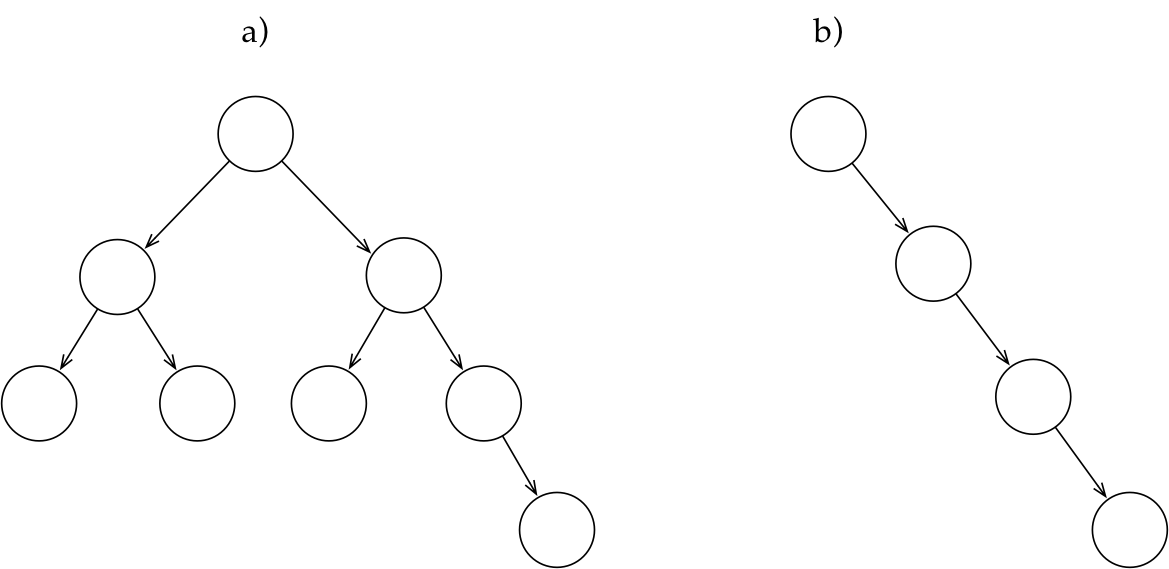

Se uma árvore é balanceada, tanto no caso da inserção quando no caso da busca, a cada chamada recursiva do algoritmo, descartamos metade da árvore original. Portanto, a complexidade assintótica desses dois procedimentos é logarítmica no tamanho (número de nós) da árvore. Na verdade, muitos procedimentos que operam sobre árvores binárias de pesquisa funcionam com base nessa mesma ideia de eliminar metade da árvore a cada etapa do procedimento. Isso ocorre por causa da natureza recursiva das árvores binárias de pesquisa e pela forma como os nós são inseridos nelas.

Entretanto, se a árvore não for balanceada, não descartaremos metade da árvore original a cada chamada recursiva. Em casos como o da árvore não balanceada mostrada acima, a complexidade dos procedimentos de inserção e busca será linear no tamanho da árvore, pois, na prática, a árvore mostrada funciona como se fosse uma lista encadeada.

No caso de árvores binárias, é importante sempre fazer a distinção da complexidade dos procedimentos caso a árvore seja balanceada e caso ela não seja. Além disso, é importante estar atento a procedimentos que parecem logarítmicos, mas que na verdade visitam todos os nós da árvore. Para resumir, tenha em mente as seguintes situações:

- Se um procedimento visita todos os nós de uma árvore, sua complexidade assintótica é linear no número de nós da árvore. Como exemplo desse tipo de procedimento citamos os caminhamentos pré-ordem, em ordem, e pós-ordem.

- Se um procedimento descarta metade da árvore a cada iteração ou chamada e a árvore é balanceada, sua complexidade é logarítmica no tamanho da árvore. Como exemplo desse tipo de procedimento citamos a inserção e a busca em árvores binárias de pesquisa, quando executados em árvores balanceadas.

- Se um procedimento descarta metade da árvore a cada iteração ou chamada mas a árvore não é balanceada, sua complexidade é linear no tamanho da árvore. Como exemplo desse tipo de procedimento citamos a inserção e a busca em árvores binárias de pesquisa, quando executados em árvores não balanceadas.

Existe uma forma alternativa de se analisar a complexidade de operações em árvores e que dependem de a árvore ser ou não balanceada. Essa alternativa consiste de descrevermos a complexidade assintótica das operações não em termos do tamanho (número de nós) da árvore, mas em termos da altura (número de níveis) da árvore. A altura de uma árvore balanceada, como a mostrada na parte a) da figura anterior, será O(logn), mas se a árvore não for balanceada, como a mostrada na parte b) da figura anterior, a altura será O(n). A escolha de se analisar a complexidade em termos do tamanho da árvore ou de sua altura é uma escolha sua. Mas seja qual for a sua escolha, tenha em mente que, dependendo da forma como os nós estiverem organizados na árvore, as operações podem ser logarítmicas ou lineares.